### This project is all the about the analysis of netfilx - movies and series 

In [1]:
#Import all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_show_df = pd.read_csv('D:\\Data Science-edwisor\\Netfilx data\\netflix_titles.csv')

In [3]:
netflix_show_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
netflix_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
netflix_show_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Data Cleaning and Preparation

In [6]:
#Missing value analysis

In [7]:
netflix_show_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [8]:
netflix_show_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
netflix_show_df.isnull().sum().sum()

3036

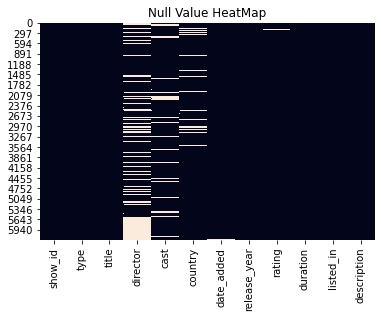

In [10]:
sns.heatmap(netflix_show_df.isnull(), cbar = False)
plt.title('Null Value HeatMap')
plt.show()

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 3,036 null values across the entire dataset with 1,969 missing points under 'director', 570 under 'cast', 476 under 'country', 11 under 'date_added', and 10 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

In [11]:
#Handling null values
netflix_show_df['director'].fillna('No Director', inplace=True)
netflix_show_df['cast'].fillna('No Cast', inplace=True)
netflix_show_df['country'].fillna('Country Unavailable', inplace=True)
netflix_show_df.dropna(subset=['date_added','rating'],inplace=True)

In [12]:
netflix_show_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. After, we can see that there are no more null values in the dataset.

In [13]:
netflix_show_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


### Splitting the dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [14]:
netflix_movies_df = netflix_show_df[netflix_show_df['type'] == 'Movie'].copy()
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [15]:
netflix_tvshow_df = netflix_show_df[netflix_show_df['type'] == 'TV Show'].copy()
netflix_tvshow_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


### Data Preparation
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [16]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_tvshow_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_tvshow_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_tvshow_df.seasons = netflix_tvshow_df.seasons.str.replace(' Seasons','').astype(int)

In [17]:
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [18]:
netflix_tvshow_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2,"International TV Shows, Reality TV",A new set of six men and women start their liv...


### Exploratory Data Analysis

Let's find some insights in complete netflix dataset again and lets revisit it.

In [19]:
netflix_show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [20]:
netflix_show_df['type'].value_counts()

Movie      4257
TV Show    1957
Name: type, dtype: int64

No handles with labels found to put in legend.


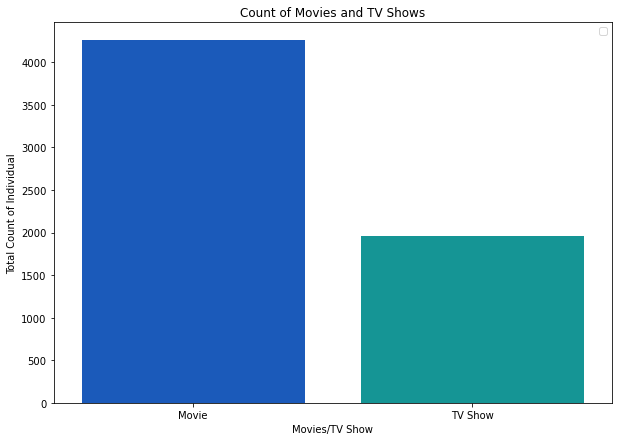

In [21]:
plt.figure(figsize = (10,7))
count_plt = sns.countplot(netflix_show_df.type, palette = 'winter')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Movies/TV Show')
plt.ylabel('Total Count of Individual')
plt.legend()
plt.show()

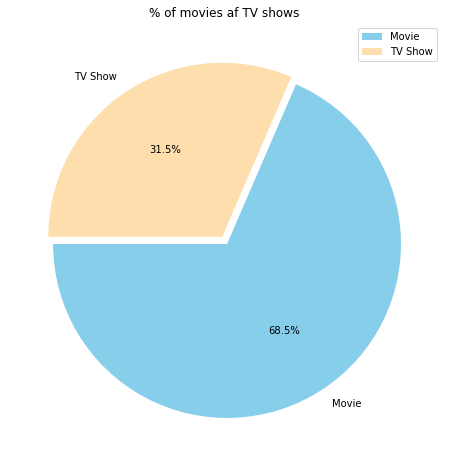

In [22]:
plt.figure(figsize = (12,8))
plt.title('% of movies af TV shows')
plot_pie = plt.pie(netflix_show_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_show_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

So there are roughly 4,000+ movies and almost 2,000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

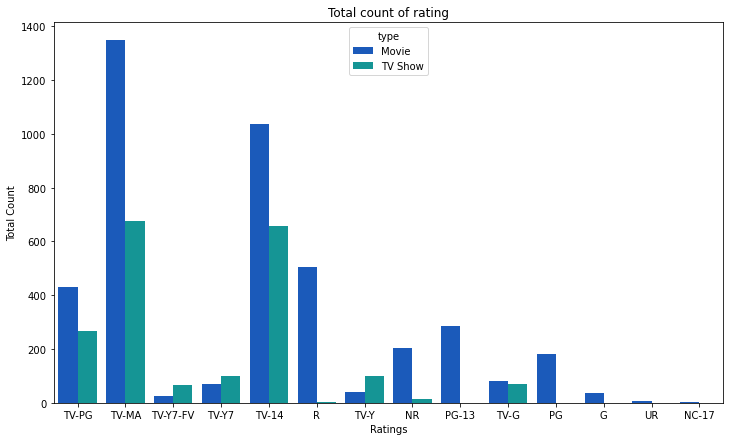

In [23]:
plt.figure(figsize = (12,7))
sns.countplot(netflix_show_df.rating, hue = netflix_show_df.type, palette = 'winter');
plt.title('Total count of rating')
plt.xlabel('Ratings')
plt.ylabel('Total Count')
plt.show()

<ipython-input-36-701ec9950e12>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


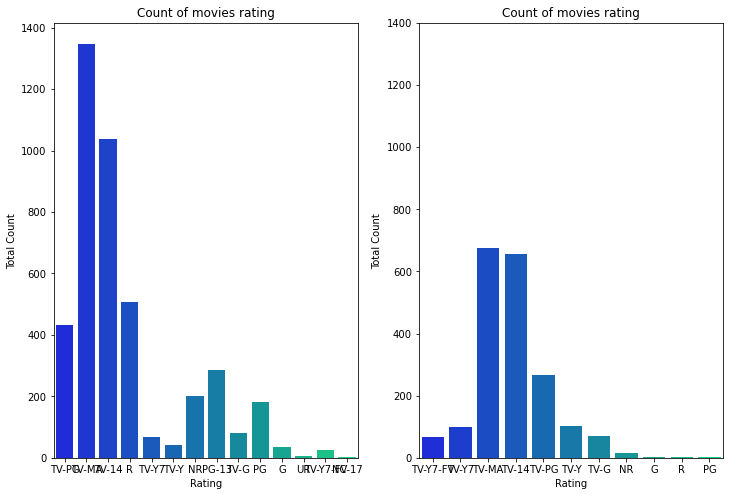

In [36]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
g1 = sns.countplot(netflix_movies_df.rating, ax=ax[0], palette = 'winter')
g1.set_title('Count of movies rating')
g1.set_xlabel('Rating')
g1.set_ylabel('Total Count')
g2 = sns.countplot(netflix_tvshow_df.rating, ax=ax[1], palette = 'winter')
g2.set(yticks=np.arange(0,1600,200))
g2.set_title('Count of movies rating')
g2.set_xlabel('Rating')
g2.set_ylabel('Total Count')
fig.show()

In [37]:
netflix_show_df['year_added'] = pd.DatetimeIndex(netflix_show_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_tvshow_df['year_added'] = pd.DatetimeIndex(netflix_tvshow_df['date_added']).year
netflix_show_df['month_added'] = pd.DatetimeIndex(netflix_show_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_tvshow_df['month_added'] = pd.DatetimeIndex(netflix_tvshow_df['date_added']).month

In [39]:
netflix_movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,9


### Netflix content added in each individual years

Now, we will look the amount of content that added in each individual years in netflix

In [51]:
netflix_years  = netflix_show_df['year_added'].value_counts().reset_index().rename(columns = {'index':'year', 'year_added' :'count'})
netflix_years 

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
4,2020,184
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7


In [53]:
netflix_year2 = netflix_show_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

In [54]:
netflix_year2

,type,year_added
0,Movie,2019
1,Movie,2016
2,TV Show,2018
3,TV Show,2018
4,Movie,2017
...,...,...
6218,TV Show,2019
6219,TV Show,2019
6220,TV Show,2016
6221,TV Show,2016


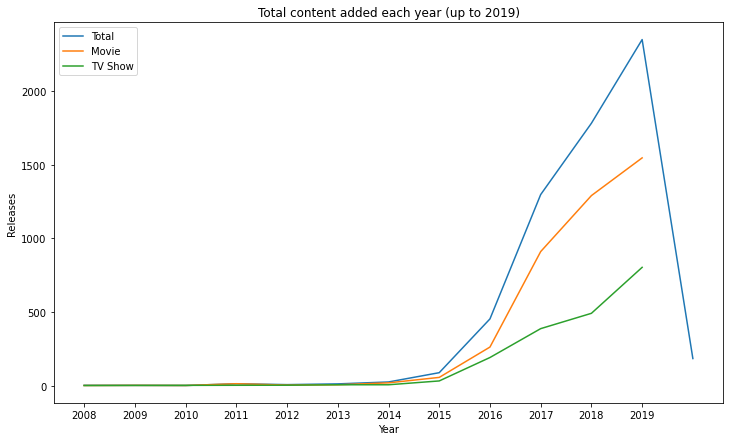

In [58]:
fig, ax = plt.subplots( figsize = (12,7))
sns.lineplot(data = netflix_years, x= 'year', y= 'count')
sns.lineplot(data = movie_year, x = 'year', y='count')
sns.lineplot(data= show_year, x = 'year', y = 'count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

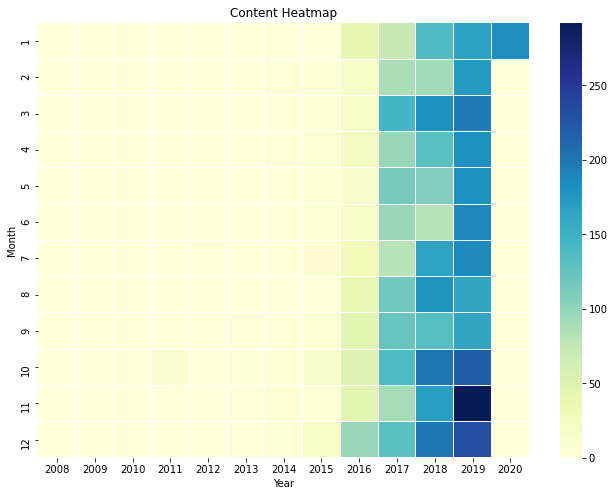

In [63]:
month_year_df = netflix_show_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

### Netflix film duration

<ipython-input-65-739a8457d215>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


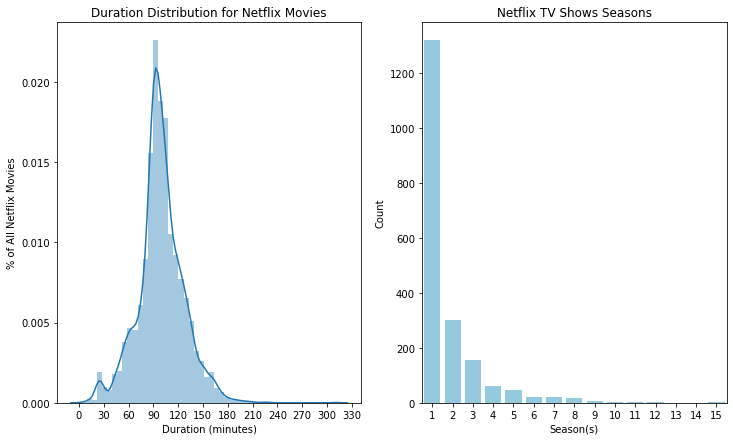

In [65]:
fig, ax = plt.subplots(1,2, figsize = (12,7))
g1 = sns.distplot(netflix_movies_df.duration, ax= ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_tvshow_df.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

### Countries with maximum contents

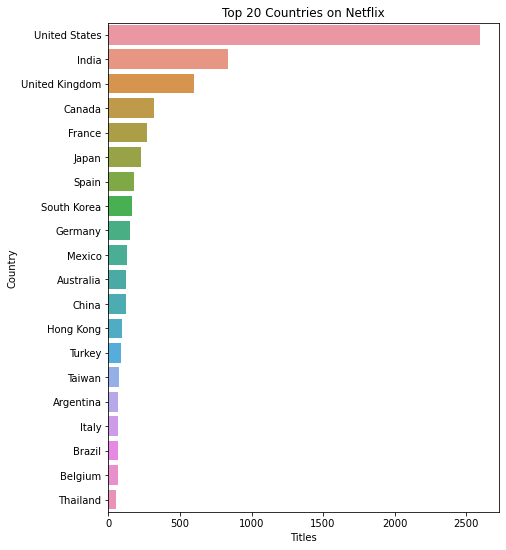

In [74]:
country_filter = netflix_show_df.country.str.split(', ', expand = True).stack().reset_index(level=1, drop=True);

country_filter = country_filter[country_filter != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = country_filter, order=country_filter.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [73]:
country_filter

title
Norm of the North: King Sized Adventure     United States
Norm of the North: King Sized Adventure             India
Norm of the North: King Sized Adventure       South Korea
Norm of the North: King Sized Adventure             China
Jandino: Whatever it Takes                 United Kingdom
                                                ...      
Talking Tom and Friends                          Thailand
Pokémon the Series                                  Japan
Justin Time                                        Canada
Terrace House: Boys & Girls in the City             Japan
Weeds                                       United States
Length: 7164, dtype: object

### popular genres

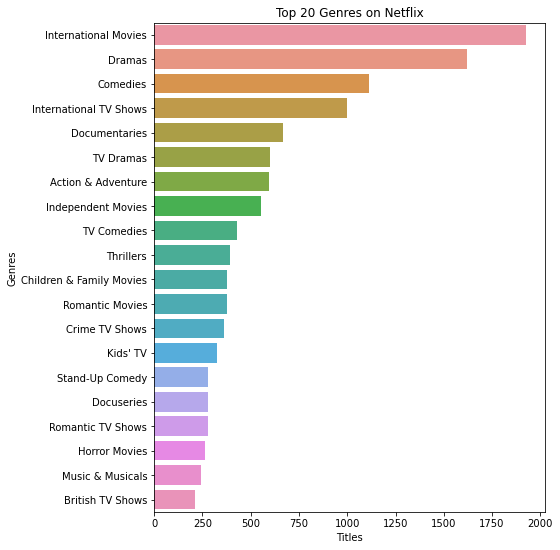

In [75]:
Genre_filter = netflix_show_df.set_index('title').listed_in.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = Genre_filter, order=Genre_filter.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Some More Detailed and Answers

## Top 10 directors with most releases

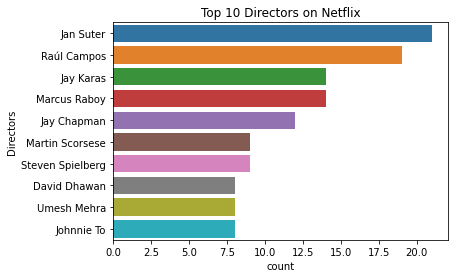

In [85]:
Top_Directors = netflix_show_df[netflix_show_df.director != 'No Director'].set_index('title').director.str.split(', ', expand = True).stack().reset_index(level = 1, drop= True)

sns.countplot(y = Top_Directors , order = Top_Directors.value_counts().index[:10])
plt.title('Top 10 Directors on Netflix')
plt.xlabel('count')
plt.ylabel('Directors')
plt.show()

### Top 10 Actors on Netflix

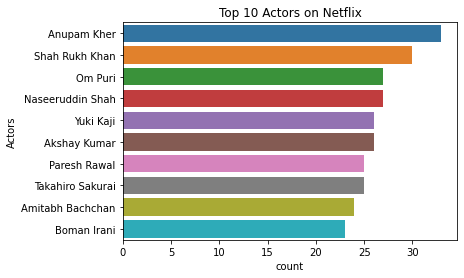

In [87]:
top_actors = netflix_show_df[netflix_show_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

sns.countplot(y = top_actors, order = top_actors.value_counts().index[:10])
plt.title('Top 10 Actors on Netflix')
plt.xlabel('count')
plt.ylabel('Actors')
plt.show()

### How the timeline look like for the addition of International Movies compared to International TV Shows

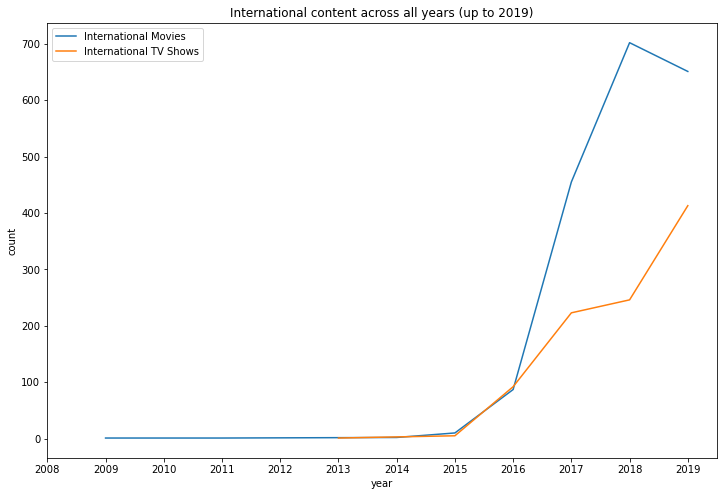

In [112]:
international_movies = netflix_show_df[netflix_show_df['listed_in'].str.contains('International Movies')]
intr_mov = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns ={'index':'year', 'year_added':'count'})
intr_mov = intr_mov[intr_mov.year !=2020]

international_shows = netflix_show_df[netflix_show_df['listed_in'].str.contains('International TV Shows')]
intr_tvshow = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns = {'index':'year','year_added':'count'})
intr_tvshow = intr_tvshow[intr_tvshow.year !=2020]

fig,ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = intr_mov, x = 'year', y='count')
sns.lineplot(data = intr_tvshow, x = 'year', y = 'count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()


Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years

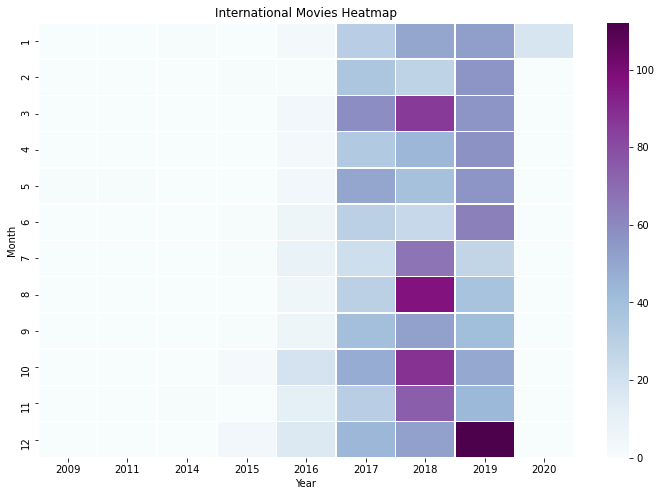

In [135]:
intmov_year_month_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(intmov_year_month_df, linewidths = 0.5, cmap = 'BuPu')
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.

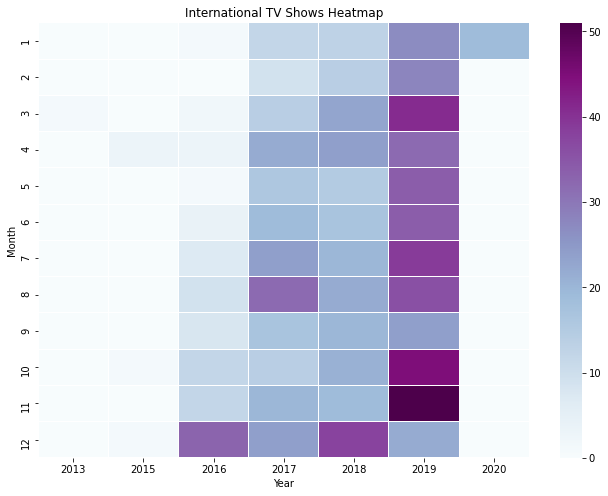

In [136]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.

### Conclusion

It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion